In [2]:
import pandas as pd
import geopandas
from opt_funcs import optimise

In [3]:
buildings_df = pd.read_csv("save_files/buildings_all_zones_df.csv")
grid_gdf = geopandas.read_file("save_files/grid_250.shp")
grid_intervals = 250

In [4]:
# res = optimise(n_fac=12,
#                n_iterations=10,
#                buildings_df=buildings_df,
#                grid_gdf=grid_gdf,
#                grid_intervals=grid_intervals)

# vardict = {}
# obdict = {}
# for r in range(len(res.result)):
#     vardict[r] = res.result[r].variables
#     obdict[r] = res.result[r].objectives[:]
    
# pd.DataFrame(obdict).to_csv("save_files/ob_init.csv")
# pd.DataFrame(vardict).to_csv("save_files/var_init.csv")

In [5]:
saved_results_vars = pd.read_csv("save_files/var_init.csv")
saved_results_obj = pd.read_csv("save_files/ob_init.csv")

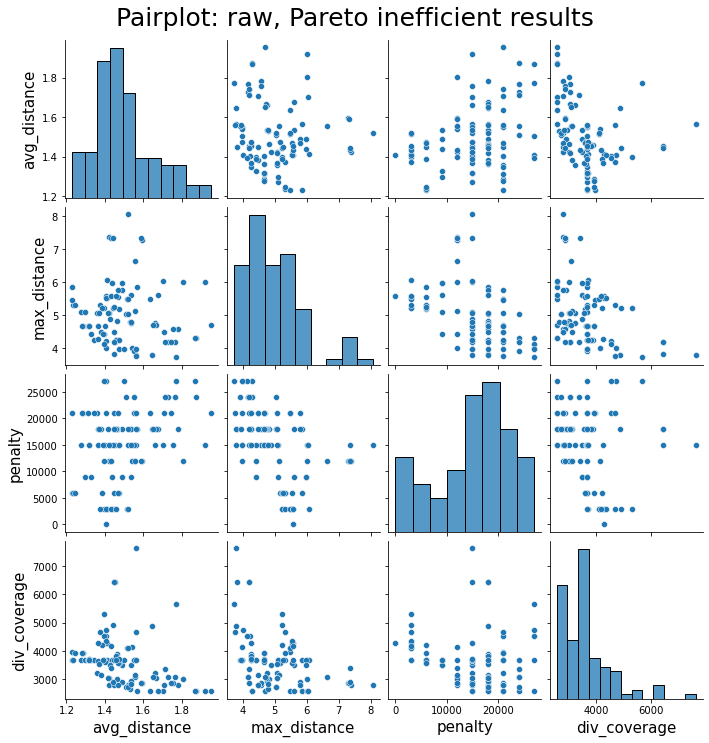

In [19]:
import seaborn
objectives = saved_results_obj.transpose().iloc[1:,:]
objectives.columns = ["avg_distance","max_distance","penalty","div_coverage"]
seaborn.set_context( rc={"axes.labelsize":15})
pp = seaborn.pairplot(objectives)#raw_results.iloc[:,1:])
pp.fig.suptitle("Pairplot: raw, Pareto inefficient results",y=1.03,size=25);

In [20]:
import plotly.express as px


fig = px.parallel_coordinates(objectives, 
                              #color="nb_facs", 
                              #dimensions = ["0","1","2","3"],
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              #color_continuous_midpoint=4.5,
                              title="Parallel axis plot of policy options")
fig.show()

In [22]:
variables = saved_results_vars.transpose().iloc[1:,:]

In [23]:
variables

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,31.351692,3.375902,31.405814,3.472376,31.345969,3.370739,31.318900,3.399024,31.280230,3.316859,...,31.399123,3.401198,31.375713,3.465381,31.378865,3.382240,31.351135,3.268609,31.383813,3.465836
1,31.352374,3.379768,31.377192,3.471163,31.310632,3.380864,31.336325,3.410407,31.300710,3.324622,...,31.392160,3.393937,31.346695,3.406327,31.379735,3.479107,31.371041,3.265635,31.369385,3.400792
2,31.351471,3.472571,31.404893,3.472376,31.310099,3.371220,31.346757,3.400819,31.279983,3.317033,...,31.399259,3.405407,31.375713,3.465105,31.379861,3.386063,31.372410,3.271809,31.389105,3.397884
3,31.356499,3.372909,31.377331,3.471238,31.333129,3.399004,31.353401,3.401272,31.300769,3.324854,...,31.389036,3.390036,31.375930,3.405643,31.362734,3.469089,31.373113,3.248985,31.395547,3.474406
4,31.351679,3.269814,31.409457,3.472353,31.310096,3.371797,31.334553,3.404105,31.280692,3.324884,...,31.386941,3.421070,31.378964,3.375092,31.365928,3.378746,31.350487,3.505130,31.351205,3.397051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,31.351656,3.372646,31.404840,3.471281,31.309869,3.387745,31.336107,3.399991,31.287487,3.324314,...,31.392304,3.392149,31.357403,3.462456,31.379624,3.486492,31.377904,3.266237,31.352046,3.402446
96,31.351762,3.380221,31.377346,3.531085,31.315322,3.377712,31.332955,3.388464,31.287983,3.326874,...,31.396114,3.403255,31.346626,3.405327,31.382264,3.479718,31.371752,3.256257,31.369629,3.457293
97,31.351975,3.374169,31.399580,3.471303,31.309905,3.388436,31.333802,3.403462,31.287487,3.316688,...,31.388753,3.403380,31.349599,3.464946,31.380214,3.477731,31.351397,3.259572,31.363026,3.397113
98,31.355941,3.381275,31.378094,3.471359,31.352271,3.401161,31.346424,3.402173,31.293752,3.329769,...,31.389044,3.389526,31.375918,3.464771,31.391693,3.397775,31.371131,3.256349,31.390491,3.464920


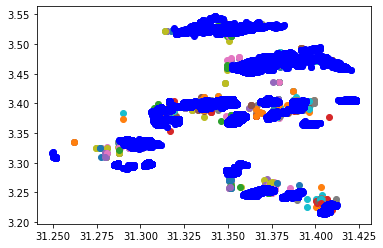

In [50]:
for i in range(len(variables)):
    for j in range(int(len(variables.iloc[i,:])/2)):
        plt.plot(variables.iloc[i,j*2],variables.iloc[i,j*2+1],'o')
buildings_df=pd.read_csv("save_files/buildings_all_zones_df.csv")

for i in range(len(buildings_df)):
    plt.plot(buildings_df.x[i],buildings_df.y[i],'bo')

NameError: name 'gdf' is not defined

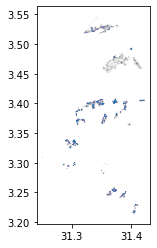

In [47]:
seaborn.set_context( rc={"axes.labelsize":12})
fig,ax = plt.subplots()
gdf2 = geopandas.read_file("../input_files/building_polygons/all_zones.shp")
gdf2.plot(ax=ax)
gdf.plot(ax=ax,color='red')
plt.title("Buildings and facilities (sel. policy) in Zone 02")
plt.xlabel("Latitude")
plt.ylabel("Longitude")